In [76]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, rand_score, normalized_mutual_info_score
import numpy as np
from scipy.cluster import hierarchy
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.pyplot as pltv
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score

In [2]:
data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=4444)

In [3]:
data2, data_y2 = make_blobs(n_samples=300, n_features=2, random_state=4444)

In [4]:
data3, data_y3 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=2235)

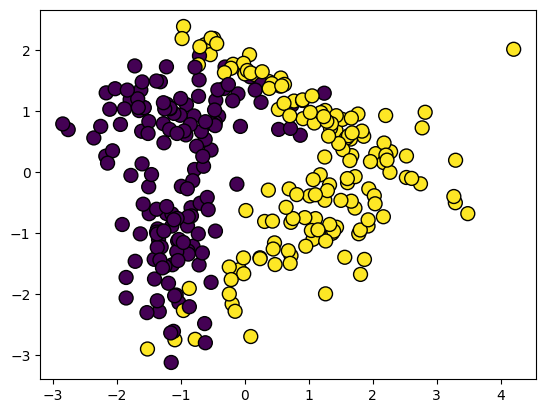

In [10]:
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=100, edgecolor="k")
plt.show()

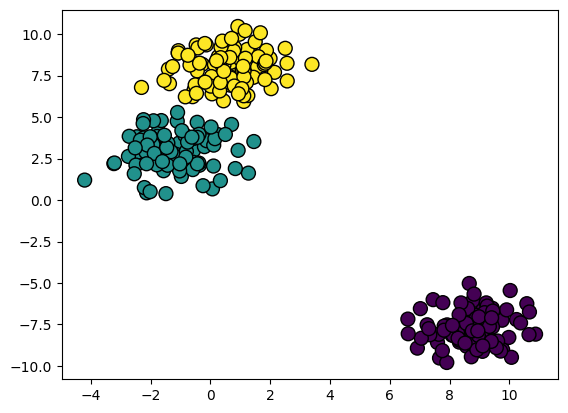

In [9]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data_y2, s=100, edgecolor="k")
plt.show()

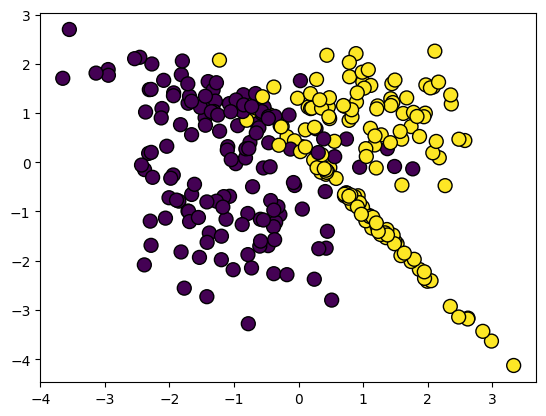

In [8]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data_y3, s=100, edgecolor="k")
plt.show()

## Kmeans

In [21]:
kmeans = KMeans(2, n_init='auto').fit(data)

In [26]:
kmeans2 = KMeans(3, n_init='auto').fit(data2)

In [23]:
kmeans3 = KMeans(2, n_init='auto').fit(data3)

0.7730434782608696
0.391131192173942
0.4543708971634602
0.4586293835311759


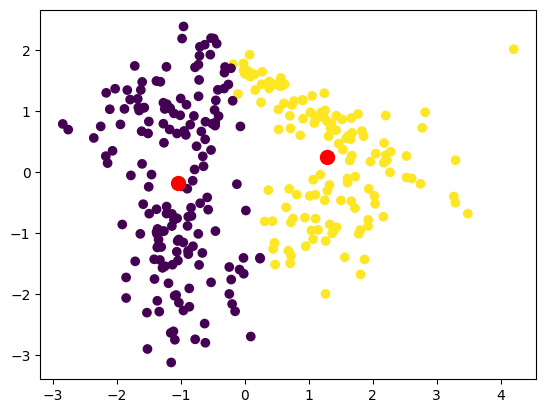

In [34]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

print(rand_score(kmeans.labels_, data_y))
print(silhouette_score(data, kmeans.labels_))
print(homogeneity_score(data_y, kmeans.labels_))#однородность : каждый кластер содержит только членов одного класса
print(completeness_score(data_y, kmeans.labels_))

1.0
0.7332059195380315
1.0
1.0


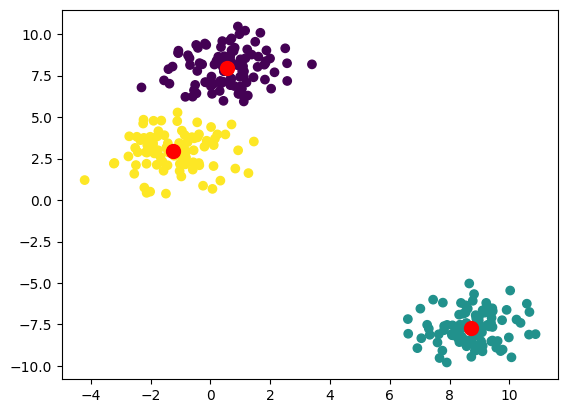

In [35]:
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

print(rand_score(kmeans2.labels_, data_y2))
print(silhouette_score(data2, kmeans2.labels_))
print(homogeneity_score(data_y2, kmeans2.labels_))
print(completeness_score(data_y2, kmeans2.labels_))

0.7830323299888517
0.3569472241604075
0.4632130047023851
0.4639420921537328


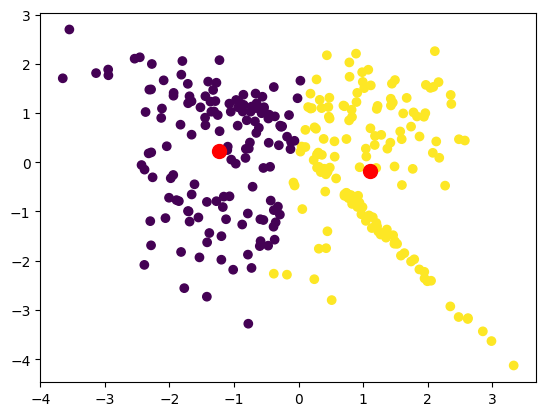

In [36]:
plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

print(rand_score(kmeans3.labels_, data_y3))
print(silhouette_score(data3, kmeans3.labels_))
print(homogeneity_score(data_y3, kmeans3.labels_))
print(completeness_score(data_y3, kmeans3.labels_))

## Метод локтя

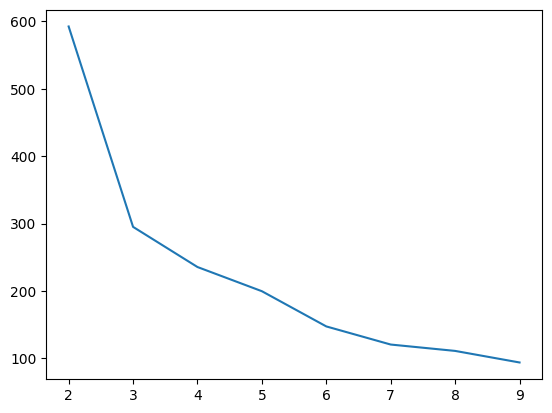

In [37]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

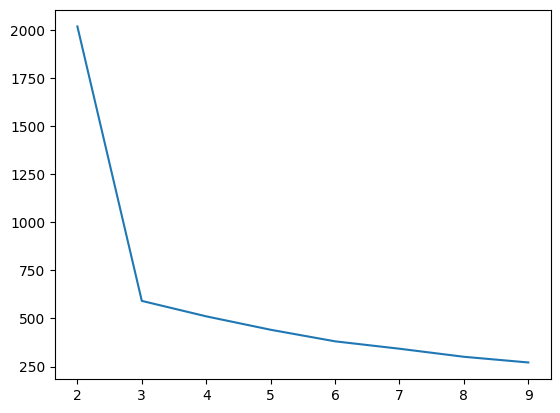

In [38]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data2)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

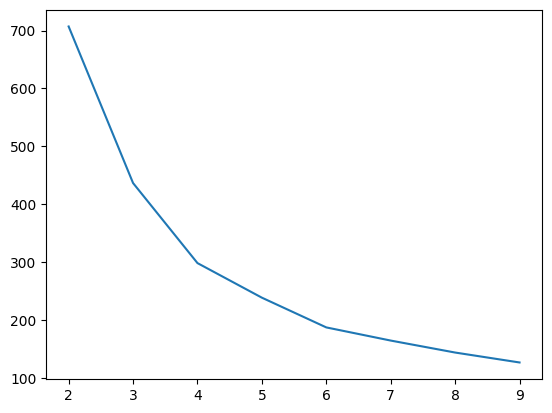

In [39]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data3)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

## Метод силуета

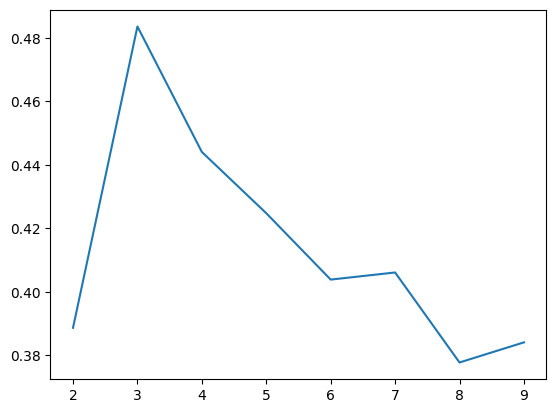

In [40]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))

plt.plot(range(2,10), ss)

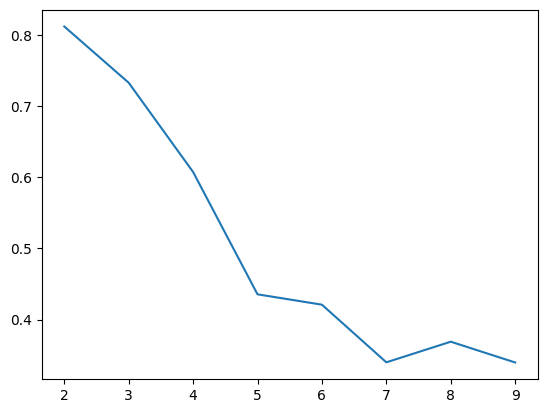

In [41]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data2, KMeans(i, n_init='auto').fit(data2).labels_))

plt.plot(range(2,10), ss)

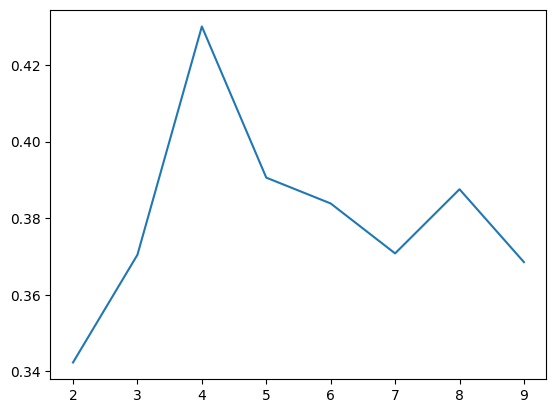

In [42]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data3, KMeans(i, n_init='auto').fit(data3).labels_))

plt.plot(range(2,10), ss)

0.6402229654403567
0.48353407326972253
0.35092741512819425
0.22176397730819697


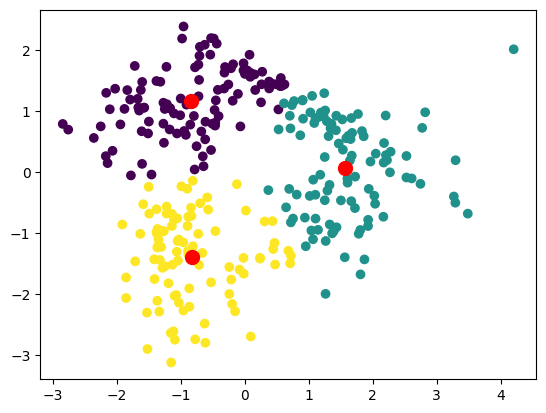

In [46]:
kmeans = KMeans(3, n_init='auto').fit(data)

plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
print(rand_score(kmeans.labels_, data_y))
print(silhouette_score(data, kmeans.labels_))
print(homogeneity_score(data_y, kmeans.labels_))#однородность : каждый кластер содержит только членов одного класса
print(completeness_score(data_y, kmeans.labels_))

1.0
0.7332059195380315
1.0
1.0


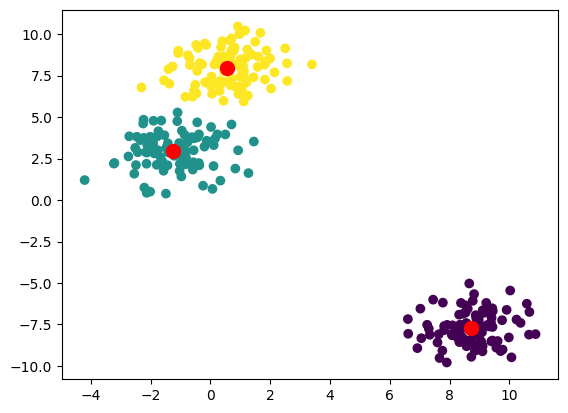

In [47]:
kmeans2 = KMeans(3, n_init='auto').fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')
print(rand_score(kmeans2.labels_, data_y2))
print(silhouette_score(data2, kmeans2.labels_))
print(homogeneity_score(data_y2, kmeans2.labels_))
print(completeness_score(data_y2, kmeans2.labels_))

0.6594202898550725
0.4300866571570984
0.5547007492237357
0.28305113735298243


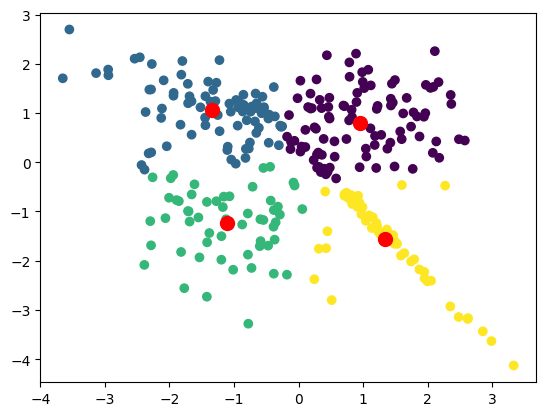

In [48]:
kmeans3 = KMeans(4, n_init='auto').fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

print(rand_score(kmeans3.labels_, data_y3))
print(silhouette_score(data3, kmeans3.labels_))
print(homogeneity_score(data_y3, kmeans3.labels_))
print(completeness_score(data_y3, kmeans3.labels_))

## Affinity propagation

0.6225418060200669
0.40305312050001757
0.6504578094855271
0.25400567151886727


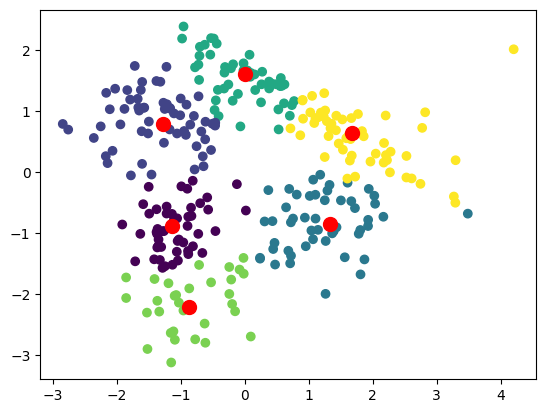

In [52]:
clustering = AffinityPropagation(preference=-42).fit(data)

plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

print(rand_score(clustering.labels_, data_y))
print(silhouette_score(data,clustering.labels_))
print(homogeneity_score(data_y, clustering.labels_))
print(completeness_score(data_y, clustering.labels_))

0.8125529542920847
0.34350677296508747
1.0000000000000004
0.5523429118991166


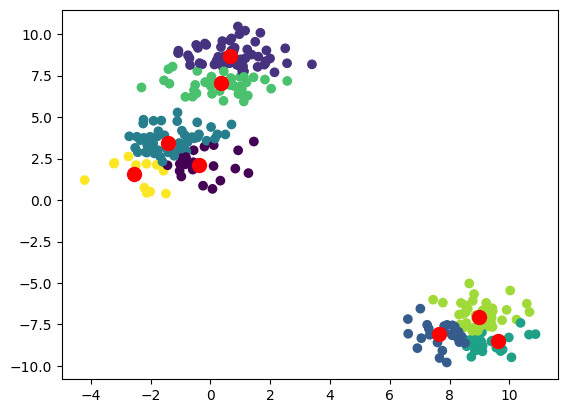

In [53]:
clustering2 = AffinityPropagation(preference=-42).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)
plt.scatter(clustering2.cluster_centers_[:,0], clustering2.cluster_centers_[:,1], s=100, c='red')

print(rand_score(clustering2 .labels_, data_y2))
print(silhouette_score(data2, clustering2.labels_))
print(homogeneity_score(data_y2, clustering2.labels_))
print(completeness_score(data_y2, clustering2.labels_))

0.5917279821627648
0.3875498119578241
0.5306190538778643
0.21106161865943182


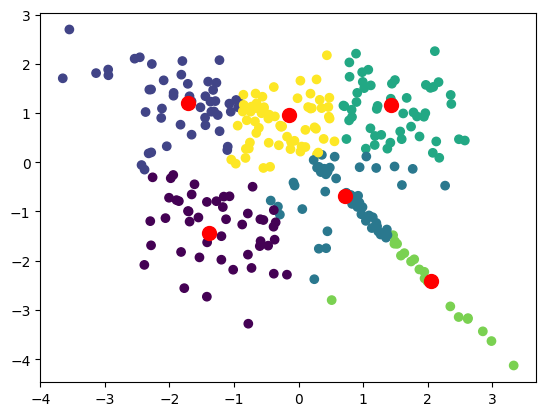

In [54]:
clustering3 = AffinityPropagation(preference=-42).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)
plt.scatter(clustering3.cluster_centers_[:,0], clustering3.cluster_centers_[:,1], s=100, c='red')

print(rand_score(clustering3.labels_, data_y3))
print(silhouette_score(data3, clustering3.labels_))
print(homogeneity_score(data_y3, clustering3.labels_))
print(completeness_score(data_y3, clustering3.labels_))

## DBSCAN

[-1  0]
0.4997547380156076
0.31797299799352813
0.01823086065622753
0.08646680779276776


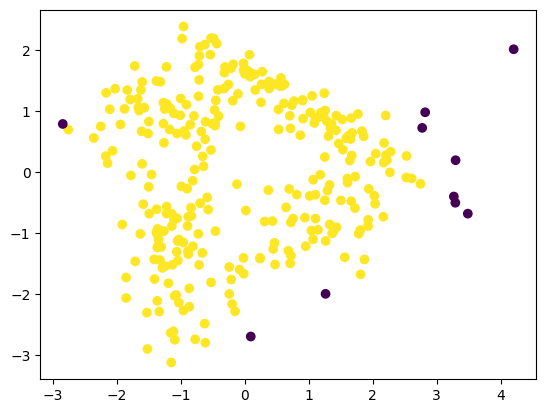

In [55]:
dbscan = DBSCAN().fit(data)

print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

print( rand_score(dbscan.labels_, data_y))
print(silhouette_score(data, dbscan.labels_))
print(homogeneity_score(data_y, dbscan.labels_) )
print(completeness_score(data_y, dbscan.labels_))

[-1  0  1  2  3]
0.5010256410256411
0.3037728147910394
0.7918457198674331
0.6064000037295993


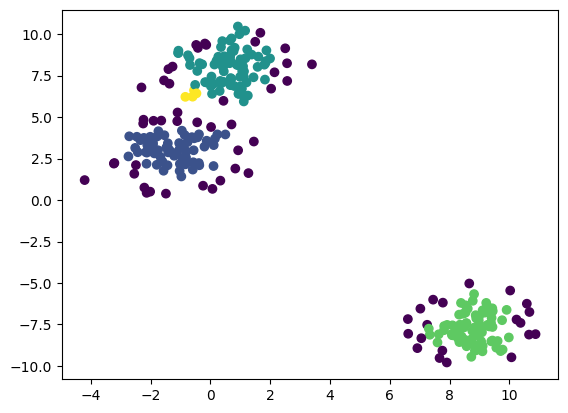

In [63]:
dbscan2 = DBSCAN().fit(data2)

print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

print(rand_score(dbscan2.labels_, data_y3))
print(silhouette_score(data2, dbscan2.labels_))
print(homogeneity_score(data_y2, dbscan2.labels_) )
print( completeness_score(data_y2, dbscan2.labels_))

[-1  0  1]
0.501159420289855
0.289857457566798
0.04390936547666852
0.09146446674637372


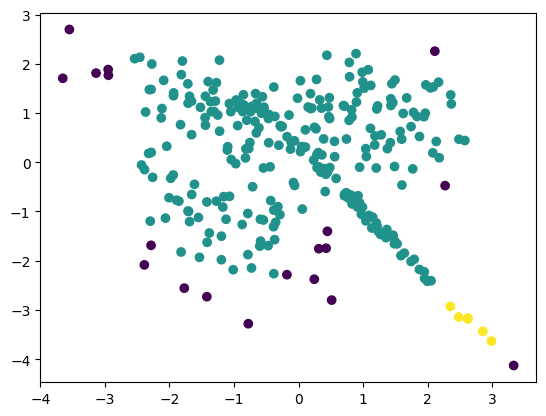

In [64]:
dbscan3 = DBSCAN().fit(data3)

print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

print(rand_score(dbscan3.labels_, data_y3))
print(silhouette_score(data3, dbscan3.labels_))
print(homogeneity_score(data_y3, dbscan3.labels_) )
print(completeness_score(data_y3, dbscan3.labels_))

In [65]:
## подбор гиперпараметров

[-1  0]
0.5005574136008919
0.267481708238356
0.015000565043045698
0.045810956791694855


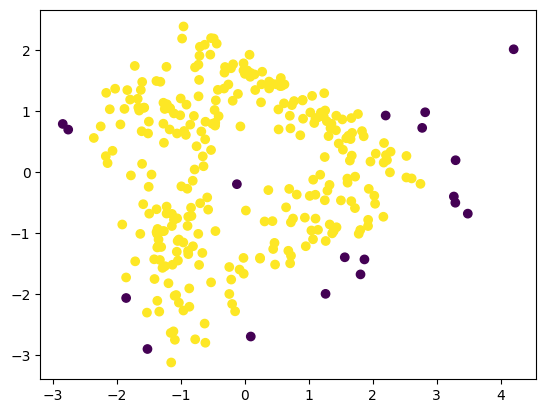

In [59]:
dbscan = DBSCAN(eps=0.4, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

print( rand_score(dbscan.labels_, data_y))
print(silhouette_score(data, dbscan.labels_))
print(homogeneity_score(data_y, dbscan.labels_) )
print(completeness_score(data_y, dbscan.labels_))

[-1  0  1  2]
0.5016276477146042
0.6470596245915863
1.0
0.9711129358060946


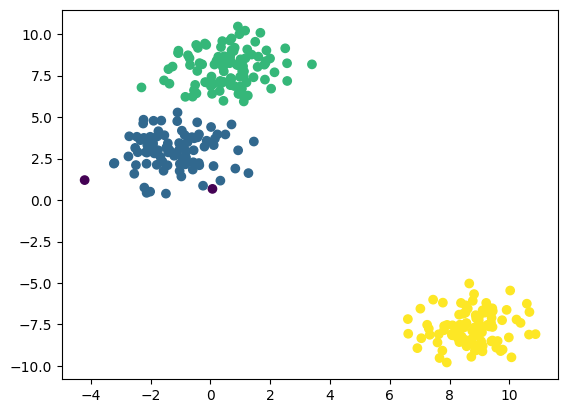

In [62]:
dbscan2 = DBSCAN(eps=1.25, min_samples=10).fit(data2)
print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

print(rand_score(dbscan2.labels_, data_y3))
print(silhouette_score(data2, dbscan2.labels_))
print(homogeneity_score(data_y2, dbscan2.labels_) )
print( completeness_score(data_y2, dbscan2.labels_))

[-1  0  1  2  3  4]
0.5401560758082498
0.11436758357847199
0.3215815769291381
0.14803352863133737


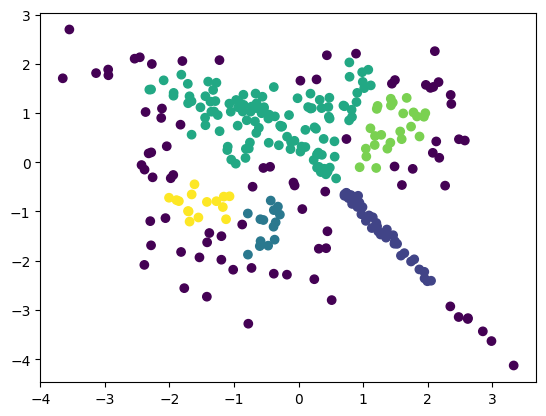

In [67]:
dbscan3 = DBSCAN(eps=0.3, min_samples=5).fit(data3)
print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

print(rand_score(dbscan3.labels_, data_y3))
print(silhouette_score(data3, dbscan3.labels_))
print(homogeneity_score(data_y3, dbscan3.labels_) )
print(completeness_score(data_y3, dbscan3.labels_))

## GaussianMixture

-3.050560389370043


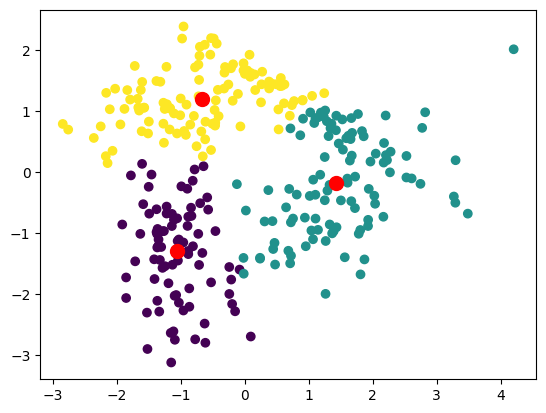

In [70]:
gm = GaussianMixture(n_components=3).fit(data)

gm.predict(data)

plt.scatter(data[:,0], data[:,1], c=gm.predict(data))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print(gm.score(data))

-3.907205835860133


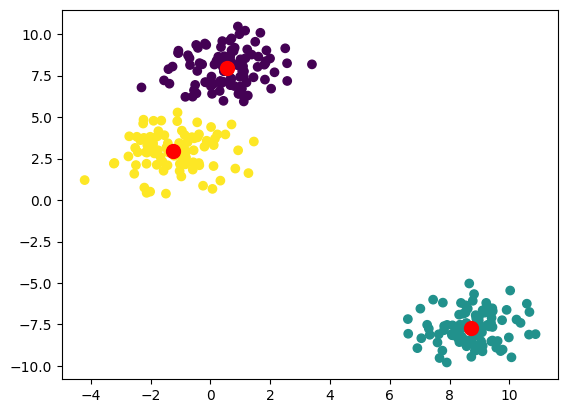

In [74]:
gm2 = GaussianMixture(n_components=3).fit(data2)

gm2.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=gm2.predict(data2))
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=100, c='red')

print(gm2.score(data2))

-2.8010635046859664


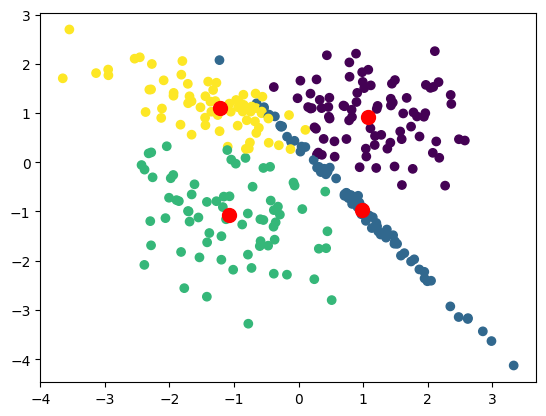

In [75]:
gm3 = GaussianMixture(n_components=4).fit(data3)

gm3.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=gm3.predict(data3))
plt.scatter(gm3.means_[:,0], gm3.means_[:,1], s=100, c='red')

print(gm3.score(data3))

## Иерархическая кластеризация AgglomerativeClustering

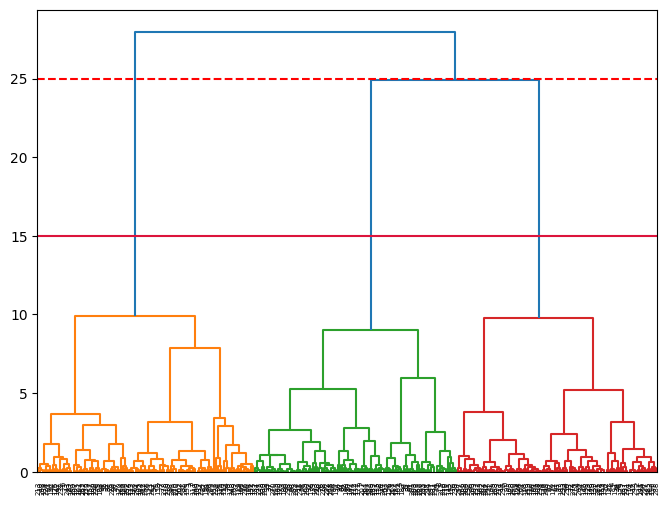

In [77]:
clusters = hierarchy.linkage(data, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

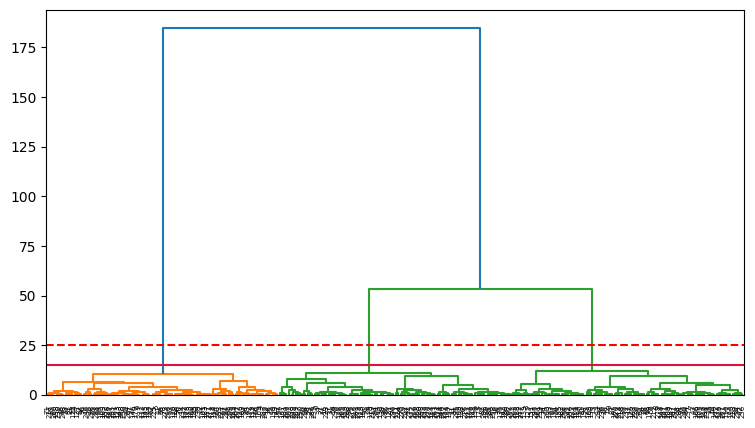

In [78]:
clusters2 = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(9, 5))
dendrogram = hierarchy.dendrogram(clusters2)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

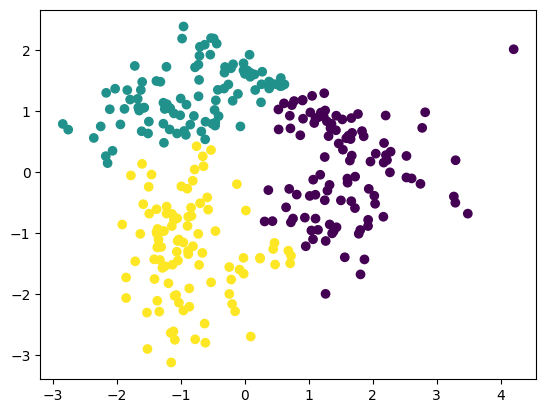

In [80]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data)
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

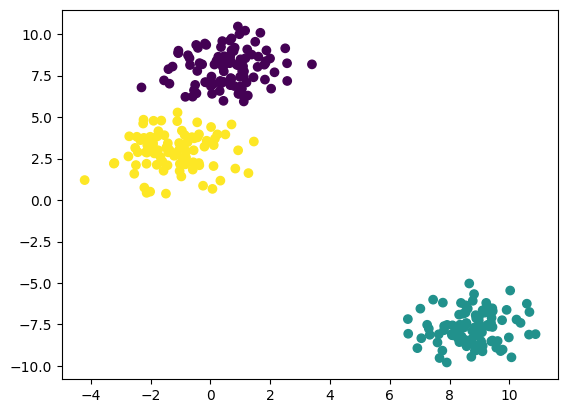

In [81]:
clustering2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)

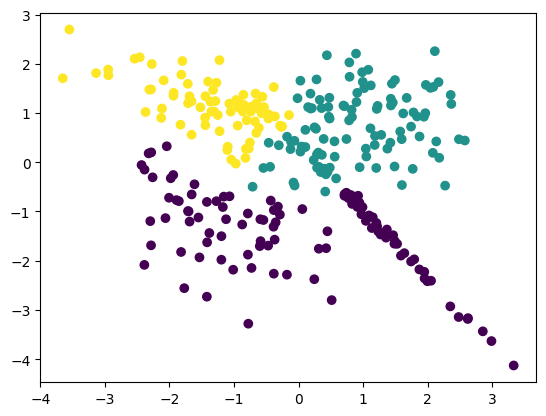

In [82]:
clustering3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)

## ЗАДАНИЕ №2

In [84]:
data_classification = pd.read_csv('D:\python\data\card_transdata4.csv')

In [85]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561043 entries, 0 to 561042
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      561043 non-null  int64  
 1   distance_from_home              561043 non-null  float64
 2   distance_from_last_transaction  561043 non-null  float64
 3   ratio_to_median_purchase_price  561043 non-null  float64
 4   repeat_retailer                 561043 non-null  float64
 5   used_chip                       561043 non-null  float64
 6   used_pin_number                 561043 non-null  float64
 7   online_order                    561043 non-null  float64
 8   fraud                           561043 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 38.5 MB


In [86]:
data_classification.drop('Unnamed: 0', axis=1, inplace=True)

In [87]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561043 entries, 0 to 561042
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              561043 non-null  float64
 1   distance_from_last_transaction  561043 non-null  float64
 2   ratio_to_median_purchase_price  561043 non-null  float64
 3   repeat_retailer                 561043 non-null  float64
 4   used_chip                       561043 non-null  float64
 5   used_pin_number                 561043 non-null  float64
 6   online_order                    561043 non-null  float64
 7   fraud                           561043 non-null  float64
dtypes: float64(8)
memory usage: 34.2 MB


In [88]:
# появилась проблема с долгой загрузкой, поэтому уменьшаю датасет:
# Разделяем датасет на классы
class_0 = data_classification[data_classification['fraud'] == 0]
class_1 = data_classification[data_classification['fraud'] == 1]
class_0_downsampled = resample(class_0, replace=False, n_samples=int(0.01 * len(class_0)), random_state=42)# Уменьшаем размер подвыборки для класса 0
small_data_classification = pd.concat([class_0_downsampled, class_1])# Объединяем данные обратно
small_data_classification = small_data_classification.sample(frac=1, random_state=42)# Перемешиваем данные, чтобы сохранить случайность

In [89]:
small_data_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13088 entries, 152299 to 132374
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              13088 non-null  float64
 1   distance_from_last_transaction  13088 non-null  float64
 2   ratio_to_median_purchase_price  13088 non-null  float64
 3   repeat_retailer                 13088 non-null  float64
 4   used_chip                       13088 non-null  float64
 5   used_pin_number                 13088 non-null  float64
 6   online_order                    13088 non-null  float64
 7   fraud                           13088 non-null  float64
dtypes: float64(8)
memory usage: 920.2 KB


In [90]:
Xclass =small_data_classification.drop('fraud', axis=1)

In [91]:
small_data_classification.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
152299,5.435134,0.041249,0.134222,1.0,0.0,0.0,1.0,0.0
148700,7.135734,2.217513,4.518822,1.0,1.0,0.0,1.0,1.0
284557,7.491515,0.843963,4.423145,1.0,0.0,0.0,1.0,1.0
281042,1.943335,4.338409,4.124294,1.0,1.0,0.0,1.0,1.0
136132,14.634330,1.474601,0.050167,1.0,1.0,0.0,0.0,0.0


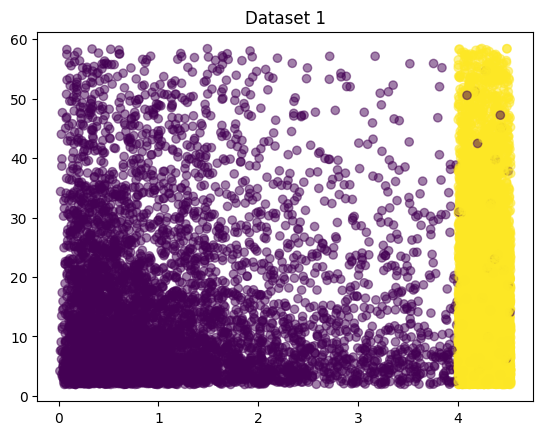

In [92]:
plt.scatter(small_data_classification['ratio_to_median_purchase_price'], small_data_classification['distance_from_home'],
            c=small_data_classification['fraud'],
            cmap='viridis', alpha=0.5)
plt.title('Dataset 1')
plt.show()

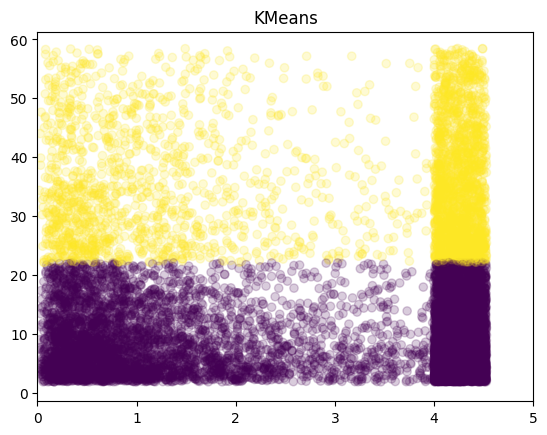

0.6568403765417721
0.5350219338677479
-0.00043235787796033927
6.31017191242316e-06


In [97]:
kmeans = KMeans(n_clusters=2, n_init=10)
cluster_labels = kmeans.fit_predict(Xclass)
small_data_classification['kmeans_optimal_labels'] = cluster_labels

plt.xlim(0, 5)
plt.scatter(small_data_classification['ratio_to_median_purchase_price'], small_data_classification['distance_from_home'],
            c=small_data_classification['kmeans_optimal_labels'], cmap='viridis', alpha=0.2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title('KMeans')
plt.show()

print(silhouette_score(Xclass, cluster_labels))
print(davies_bouldin_score(Xclass, cluster_labels))
print(adjusted_rand_score(small_data_classification['fraud'], cluster_labels))
print(normalized_mutual_info_score(small_data_classification['fraud'], cluster_labels))

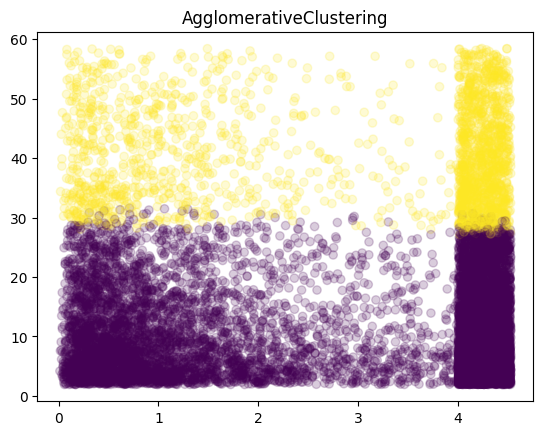

0.659122951574594
0.4725176417678957
-0.0022689926662857224
0.00020954800655168638


In [46]:
clusteringagg = AgglomerativeClustering(n_clusters=2, linkage="ward")
cluster_labels_agg = clusteringagg.fit_predict(Xclass)
small_data_classification['AgglomerativeClustering'] = cluster_labels_agg

plt.scatter(small_data_classification['ratio_to_median_purchase_price'], small_data_classification['distance_from_home'],
            c=small_data_classification['AgglomerativeClustering'], cmap='viridis', alpha=0.2)
plt.title('AgglomerativeClustering')
plt.show()
print(silhouette_score(Xclass, cluster_labels_agg ))
print(davies_bouldin_score(Xclass, cluster_labels_agg ))
print(adjusted_rand_score(small_data_classification['fraud'], cluster_labels_agg ))
print(normalized_mutual_info_score(small_data_classification['fraud'], cluster_labels_agg ))

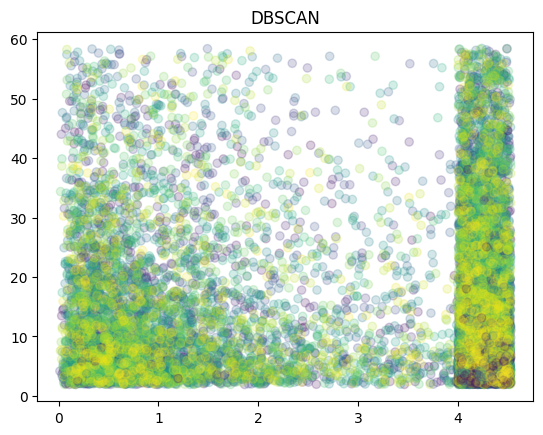

0.06726159441719838
0.12315723558557372
0.00018456782177955387
0.13773290210067063


In [73]:
dbscan = DBSCAN(eps=0.1, min_samples=1)
cluster_labels_dbscan = dbscan.fit_predict(Xclass)
small_data_classification['DBSCAN'] = cluster_labels_dbscan

plt.scatter(small_data_classification['ratio_to_median_purchase_price'], small_data_classification['distance_from_home'],
            c=small_data_classification['DBSCAN'], cmap='viridis', alpha=0.2)
plt.title('DBSCAN')
plt.show()
print(silhouette_score(Xclass, cluster_labels_dbscan))
print(davies_bouldin_score(Xclass, cluster_labels_dbscan))
print(adjusted_rand_score(small_data_classification['fraud'], cluster_labels_dbscan))
print(normalized_mutual_info_score(small_data_classification['fraud'], cluster_labels_dbscan))